불균형 데이터
- 과적합 / 분포 작은 클래스 재현율이 낮아짐 / 새로운 테스트 데이터에서 예측 성능 낮아짐

under sampling (down sampling) : 데이터 분포가 높은 값을 낮은 값으로 맞춰줌
- 유의미한 데이터만 남길 수 있음 / 정보가 유실 됨
- Random Under Sampling, Tomek link(다른 클래스끼리 가장 가까운 데이터가 토멕링크로 묶여서 토멕링크 중 분포가 높은 데이터를 제거)
 CNN(Condensed Nearest Neighbour), Edited Nearest Neighbours

over sampling (up sampling) 분포가 작은 클래스 값을 분포가 큰 클래스로 맞춰줌
- 정보의 손실을 막을 수 있음 / over fitting 될 수 있음
- Random Over Sampling, ADASYN(Adaptive Synthetic Sampling - 가상의 직선을 그려서 직선상에 존재하는 가상의 분포가 작은 클래스 데이터를 생성) 
 SMOTE(분류 모형에 따라서 다르게 분류), Combine Sampling

data argumentation (주로 이미지 분석에서 사용)



In [1]:
import pandas as pd

# csv 형식으로 된 데이터 파일을 읽어옵니다.
train = pd.read_csv('dataset/train.csv')

train

,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
0,1,8.0,0.18,0.37,1.30,0.040,15.0,96.0,0.99120,3.06,0.61,12.1,white,6
1,2,7.5,0.38,0.29,4.90,0.021,38.0,113.0,0.99026,3.08,0.48,13.0,white,7
2,3,6.1,0.27,0.33,2.20,0.021,26.0,117.0,0.98860,3.12,0.30,12.5,white,6
3,4,6.4,0.32,0.50,10.70,0.047,57.0,206.0,0.99680,3.08,0.60,9.4,white,5
4,5,8.4,0.37,0.43,2.30,0.063,12.0,19.0,0.99550,3.17,0.81,11.2,red,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3226,3227,6.4,0.16,0.31,5.30,0.043,42.0,157.0,0.99455,3.35,0.47,10.5,white,5
3227,3228,6.4,0.18,0.28,17.05,0.047,53.0,139.0,0.99724,3.25,0.35,10.5,white,6
3228,3229,6.0,0.28,0.25,1.80,0.042,8.0,108.0,0.99290,3.08,0.55,9.0,white,5
3229,3230,7.7,0.28,0.29,6.90,0.041,29.0,163.0,0.99520,3.44,0.60,10.5,white,6


In [3]:
# 문자열 형태로 바꾸기
word_to_num = {"white":0, "red":1}

train['type'] = train['type'].replace(word_to_num)
train

,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
0,1,8.0,0.18,0.37,1.30,0.040,15.0,96.0,0.99120,3.06,0.61,12.1,0,6
1,2,7.5,0.38,0.29,4.90,0.021,38.0,113.0,0.99026,3.08,0.48,13.0,0,7
2,3,6.1,0.27,0.33,2.20,0.021,26.0,117.0,0.98860,3.12,0.30,12.5,0,6
3,4,6.4,0.32,0.50,10.70,0.047,57.0,206.0,0.99680,3.08,0.60,9.4,0,5
4,5,8.4,0.37,0.43,2.30,0.063,12.0,19.0,0.99550,3.17,0.81,11.2,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3226,3227,6.4,0.16,0.31,5.30,0.043,42.0,157.0,0.99455,3.35,0.47,10.5,0,5
3227,3228,6.4,0.18,0.28,17.05,0.047,53.0,139.0,0.99724,3.25,0.35,10.5,0,6
3228,3229,6.0,0.28,0.25,1.80,0.042,8.0,108.0,0.99290,3.08,0.55,9.0,0,5
3229,3230,7.7,0.28,0.29,6.90,0.041,29.0,163.0,0.99520,3.44,0.60,10.5,0,6


In [4]:
# 분석에 필요 없는 id 와 예측하고자 하는 값 quality를 제거해줍니다.
X = train.drop(['id', 'quality'], axis=1)
y = train['quality']

In [5]:
from sklearn.linear_model import LogisticRegression

# 모델 선언
model = LogisticRegression(solver='liblinear')

# 모델 학습
model.fit(X, y)

LogisticRegression(solver='liblinear')

In [6]:
# 먼저 점수를 메기는 방법인 평가 지표(Metric)를 정의합니다.
import numpy as np

def ACCURACY(true, pred):   
    score = np.mean(true==pred)
    return score

In [7]:
# 모델의 예측과 실제 정답값을 비교합니다.
prediction = model.predict(X)

score = ACCURACY(y, prediction)

print(f"모델의 정확도는 {score*100:.2f}% 입니다")

모델의 정확도는 54.19% 입니다


In [8]:
# 어떤 부분에서 취약한지 확인
from collections import Counter

pred_cnt = Counter(prediction)
true_cnt = Counter(y)

for key in sorted(true_cnt.keys()):
    print(f"{key} 값 예측 개수: {pred_cnt[key]}개, 실제 값 개수: {true_cnt[key]}개")

4 값 예측 개수: 0개, 실제 값 개수: 108개
5 값 예측 개수: 1090개, 실제 값 개수: 1069개
6 값 예측 개수: 2050개, 실제 값 개수: 1418개
7 값 예측 개수: 91개, 실제 값 개수: 539개
8 값 예측 개수: 0개, 실제 값 개수: 97개


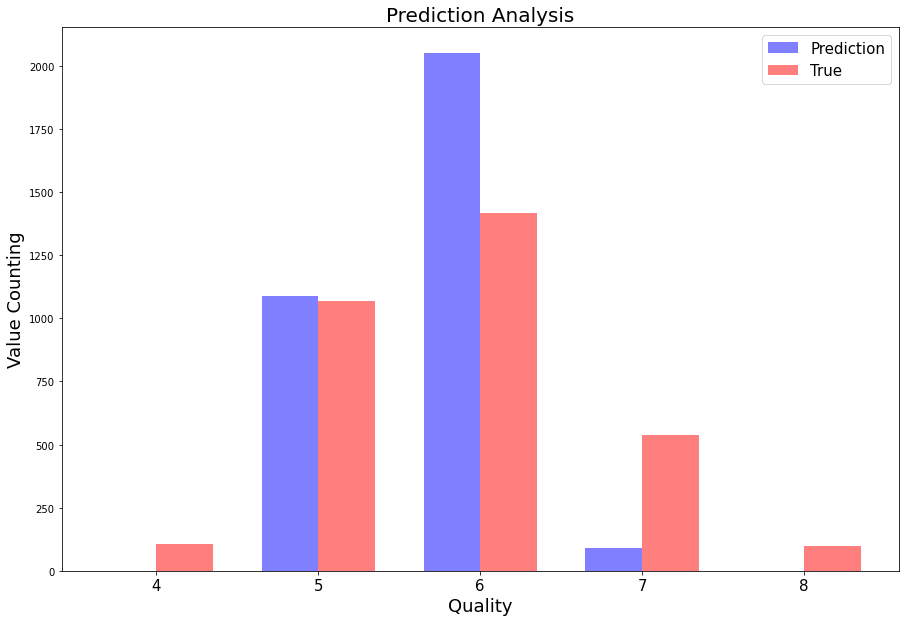

In [9]:
import matplotlib.pyplot as plt

index = sorted(true_cnt.keys())
pred_val = [pred_cnt[key] for key in index]
true_val = [true_cnt[key] for key in index]

plt.figure(figsize=(15,10))
bar_width = 0.35
p1 = plt.bar([idx-bar_width/2 for idx in index], pred_val, 
             bar_width, 
             color='b', 
             alpha=0.5)
p2 = plt.bar([idx+bar_width/2 for idx in index], true_val, 
             bar_width, 
             color='r', 
             alpha=0.5)
plt.title('Prediction Analysis', fontsize=20)
plt.ylabel('Value Counting', fontsize=18)
plt.xlabel('Quality', fontsize=18)
plt.xticks(index, fontsize=15)
plt.legend((p1[0], p2[0]), ('Prediction', 'True'), fontsize=15)
plt.show()

5를 보니 예측값과 실제값의 개수가 비슷하지만, 5에 대해서 제대로 예측했다고 볼 수 없음음
이 분석에서 알 수 있는 것은 '이 모델이 6을 매우 좋아하고 4와 8을 아주 싫어한다는 것'뿐

In [10]:
accurate = y[y==prediction]
print("정답을 맞춘 개수 : ", len(accurate))

accu_cnt = Counter(accurate)
true_cnt = Counter(y)

for key in sorted(true_cnt.keys()):
    print(f"{key} 값 예측 개수: {accu_cnt[key]}개, 실제 값 개수: {true_cnt[key]}개, 정답률: {accu_cnt[key]/true_cnt[key]*100:.2f}%")

정답을 맞춘 개수 :  1751
4 값 예측 개수: 0개, 실제 값 개수: 108개, 정답률: 0.00%
5 값 예측 개수: 642개, 실제 값 개수: 1069개, 정답률: 60.06%
6 값 예측 개수: 1057개, 실제 값 개수: 1418개, 정답률: 74.54%
7 값 예측 개수: 52개, 실제 값 개수: 539개, 정답률: 9.65%
8 값 예측 개수: 0개, 실제 값 개수: 97개, 정답률: 0.00%


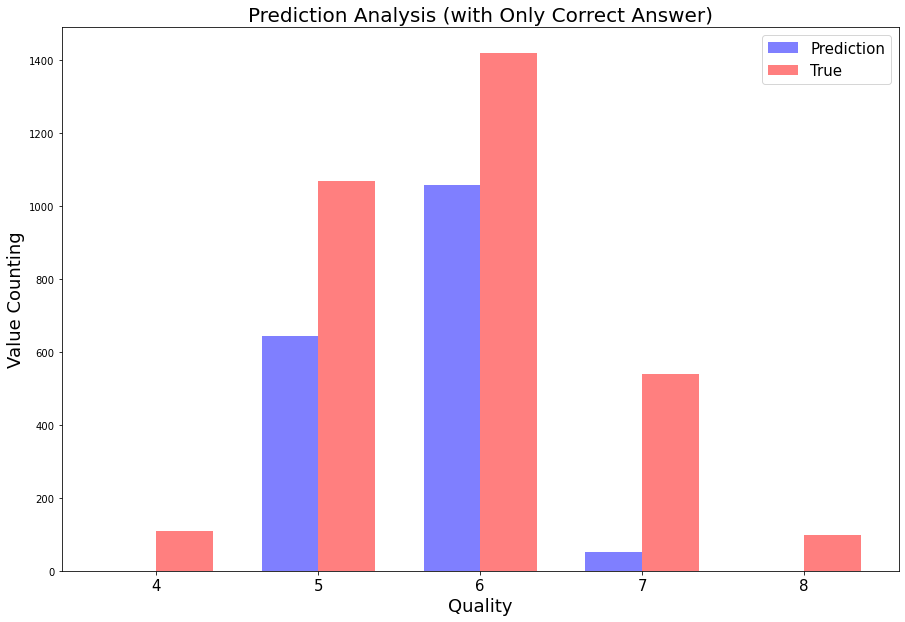

In [11]:
#정답률 
index = sorted(true_cnt.keys())
accu_val = [accu_cnt[key] for key in index]
true_val = [true_cnt[key] for key in index]

plt.figure(figsize=(15,10))
bar_width = 0.35
p1 = plt.bar([idx-bar_width/2 for idx in index], accu_val, 
             bar_width, 
             color='b', 
             alpha=0.5)
p2 = plt.bar([idx+bar_width/2 for idx in index], true_val, 
             bar_width, 
             color='r', 
             alpha=0.5)
plt.title('Prediction Analysis (with Only Correct Answer)', fontsize=20)
plt.ylabel('Value Counting', fontsize=18)
plt.xlabel('Quality', fontsize=18)
plt.xticks(index, fontsize=15)
plt.legend((p1[0], p2[0]), ('Prediction', 'True'), fontsize=15)
plt.show()

In [12]:
test = pd.read_csv('dataset/test.csv')
word_to_num = {"white":0, "red":1}

test['type'] = test['type'].replace(word_to_num)

prediction = model.predict(test.drop('id', axis=1))
prediction

array([6, 5, 5, ..., 5, 6, 6], dtype=int64)

In [13]:
submission = pd.read_csv('dataset/sample_submission.csv')
submission['quality'] = prediction
submission

,id,quality
0,1,6
1,2,5
2,3,5
3,4,6
4,5,5
...,...,...
3226,3227,5
3227,3228,6
3228,3229,5
3229,3230,6


In [14]:
# submission을 csv 파일로 저장합니다.
# index=False란 추가적인 id를 부여할 필요가 없다는 뜻입니다. 
# 정확한 채점을 위해 꼭 index=False를 넣어주세요.
submission.to_csv("submission.csv", index=False)